# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city   
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city   
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Lists 
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
count=0


print("Beginning Data Retrieval")
print("-----------------------------")

#Loop throug each city
for city in cities:
    count=count+1
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city  
    weather_response = requests.get(query_url)
    weather_json=weather_response.json()
    try:
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        print(f"Processing Record {count} of Set 1 | {city}")
     # Handle exceptions for a record not found
    except: 
        print("Record not found")
        pass
            
   # time.sleep(60)        
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
     

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | castelo branco
Processing Record 2 of Set 1 | sipe sipe
Processing Record 3 of Set 1 | bardiyah
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | port alfred
Record not found
Processing Record 8 of Set 1 | coshocton
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | vostok
Processing Record 11 of Set 1 | tulle
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | mentougou
Processing Record 15 of Set 1 | gamba
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | lethem
Processing Record 20 of Set 1 | seoul
Processing Record 21 of Set 1 | westport
Processing Record 22 of Set 1 | los llanos de aridane
Processing Record 23 of Set 1 | porbandar
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dictionary
weather_man_dict={'City':city_name,
           'Cloudiness':cloudiness,
           'Country':country,
           'Date':date,
           'Humidity':humidity,
           'Lat':lat,
           'Lng':lng,
           'Max Temp': max_temp,
           'Wind Speed':wind_speed}

# convert to df
weather_man_df=pd.DataFrame(weather_man_dict)

# df counts
weather_man_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [5]:
weather_man_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Castelo Branco,100,PT,1601601136,81,39.82,-7.49,59.00,8.99
1,Sipe Sipe,99,BO,1601601250,45,-17.45,-66.38,62.60,6.93
2,Al Bardīyah,0,LY,1601601250,77,31.76,25.09,69.30,3.09
3,Chui,33,UY,1601601250,76,-33.70,-53.46,55.67,11.88
4,Puerto Ayora,98,EC,1601601250,86,-0.74,-90.35,68.00,8.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_man_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,581.000000,5.810000e+02,581.000000,581.000000,581.000000,581.000000,581.000000
mean,51.017212,1.601601e+09,71.287435,20.884234,15.422599,63.164028,7.924871
std,41.547020,7.790820e+01,21.250842,33.012057,89.498333,16.698523,5.841048
min,0.000000,1.601601e+09,1.000000,-54.800000,-179.170000,14.270000,0.090000
25%,1.000000,1.601601e+09,60.000000,-7.260000,-63.000000,50.680000,3.440000
50%,57.000000,1.601601e+09,77.000000,27.330000,17.330000,64.040000,6.930000
75%,97.000000,1.601601e+09,87.000000,47.670000,95.320000,77.000000,11.180000
max,100.000000,1.601601e+09,100.000000,78.220000,178.420000,105.800000,58.540000


In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_man_df[weather_man_df.Humidity>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame
latitude=weather_man_df["Lat"]
temperature=weather_man_df["Max Temp"]
humidity=weather_man_df["Humidity"]
cloudiness=weather_man_df["Cloudiness"]
wind_speed=weather_man_df["Wind Speed"]

# Export the City_Data into a csv
weather_man_df.to_csv("output_data/weather_man_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

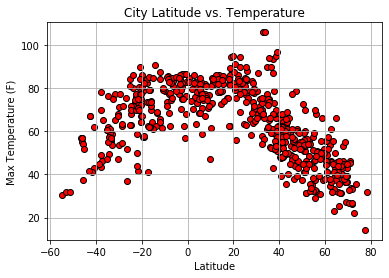

In [10]:
plt.scatter(latitude,temperature,marker="o",facecolors="red",edgecolors="black")
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/Fig1.png')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

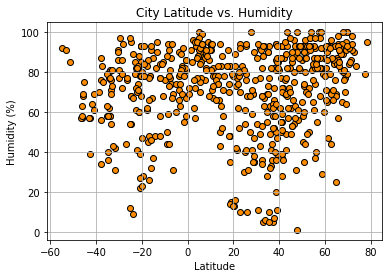

In [11]:
plt.scatter(latitude,humidity,marker="o",facecolors="darkorange",edgecolors="black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Fig2.png')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

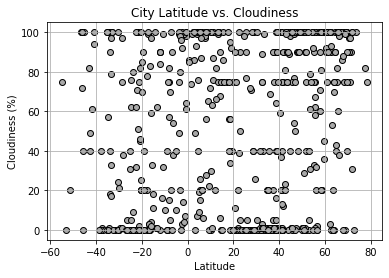

In [12]:
plt.scatter(latitude,cloudiness,marker="o",facecolors="darkgray",edgecolors="black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/Fig3.png')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

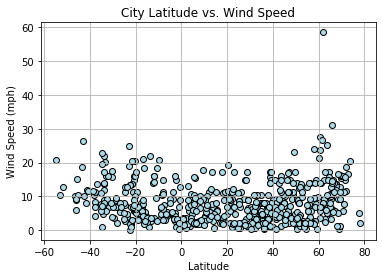

In [13]:
plt.scatter(latitude,wind_speed,marker="o",facecolors="lightblue",edgecolors="black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/Fig4.png')
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression